In [ ]:
!pip install pdfminer.six nltk spacy transformers torch pandas scikit-learn
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 12.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
from pdfminer.high_level import extract_text
#!pip install pymupdf
#import fitz
#!pip install PyPDF2 --upgrade
#import PyPDF2
#!pip install tika
#from tika import parser
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#CONVERT PDF TO TEXT

# Directory paths
input_directory = '/content/drive/MyDrive/ResearchDataSet/FullResumeData'
output_directory = '/content/drive/MyDrive/ResearchDataSet/ExtractedTextFiles'

if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Function to convert PDF to text using PDFMiner
def convert_pdf_to_text(file_path):
    return extract_text(file_path)

# List all PDF files in the input directory
file_names = [f for f in os.listdir(input_directory) if f.endswith('.pdf')]

# Process and save the text output for each PDF file
for file_name in file_names:
    file_path = os.path.join(input_directory, file_name)
    text = convert_pdf_to_text(file_path)
    output_file_path = os.path.join(output_directory, f"{os.path.splitext(file_name)[0]}_pdfminer.txt")
    with open(output_file_path, 'w') as text_file:
        text_file.write(text)
        print(f"Processed {file_name} and saved to {output_file_path}")

Processed 1_Nethika Alagaratnam.pdf and saved to /content/drive/MyDrive/ResearchDataSet/ExtractedTextFiles/1_Nethika Alagaratnam_pdfminer.txt
Processed 2_Mathusan Arudselvam.pdf and saved to /content/drive/MyDrive/ResearchDataSet/ExtractedTextFiles/2_Mathusan Arudselvam_pdfminer.txt
Processed 3_Varatharasa Sasitharan.pdf and saved to /content/drive/MyDrive/ResearchDataSet/ExtractedTextFiles/3_Varatharasa Sasitharan_pdfminer.txt
Processed 4_Jananya.pdf and saved to /content/drive/MyDrive/ResearchDataSet/ExtractedTextFiles/4_Jananya_pdfminer.txt
Processed 5_Jeyachandran Jeyakumar.pdf and saved to /content/drive/MyDrive/ResearchDataSet/ExtractedTextFiles/5_Jeyachandran Jeyakumar_pdfminer.txt
Processed 6_Pirunthapan Murugaiah.pdf and saved to /content/drive/MyDrive/ResearchDataSet/ExtractedTextFiles/6_Pirunthapan Murugaiah_pdfminer.txt
Processed 7_Printhan Vigneswaran.pdf and saved to /content/drive/MyDrive/ResearchDataSet/ExtractedTextFiles/7_Printhan Vigneswaran_pdfminer.txt
Processed 8_

In [ ]:
#TEXT PREPROCESSING
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

nltk.download('punkt')
nltk.download('stopwords')

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Function to preprocess and structure text
def preprocess_text(text):
    structured_text = []
    stop_words = set(stopwords.words('english'))

    # Tokenize text into sentences
    sentences = sent_tokenize(text)

    for sentence in sentences:
        # Lowercase the sentence
        sentence = sentence.lower()

        # Tokenize the sentence into words
        tokens = word_tokenize(sentence)

        # Remove non-alphanumeric tokens and stopwords, and lemmatize
        cleaned_tokens = [nlp(token)[0].lemma_ for token in tokens if token.isalnum() and token not in stop_words]

        # Join the cleaned tokens back into a sentence
        cleaned_sentence = ' '.join(cleaned_tokens)

        # Append the cleaned sentence to the structured text
        structured_text.append(cleaned_sentence)

    # Join sentences back into a structured text
    return '\n'.join(structured_text)

# Directory for cleaned text files
cleaned_files_directory = '/content/drive/MyDrive/ResearchDataSet/CleanedTextFiles'

if not os.path.exists(cleaned_files_directory):
    os.makedirs(cleaned_files_directory)

# Process and save the cleaned text for each file
text_file_names = [f for f in os.listdir(output_directory) if f.endswith('.txt')]

for file_name in text_file_names:
    input_file_path = os.path.join(output_directory, file_name)
    output_file_path = os.path.join(cleaned_files_directory, file_name)

    with open(input_file_path, 'r') as file:
        text = file.read()
        cleaned_text = preprocess_text(text)

        with open(output_file_path, 'w') as cleaned_file:
            cleaned_file.write(cleaned_text)

        print(f"Processed and cleaned {file_name} and saved to {output_file_path}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Processed and cleaned 1_Nethika Alagaratnam_pdfminer.txt and saved to /content/drive/MyDrive/ResearchDataSet/CleanedTextFiles/1_Nethika Alagaratnam_pdfminer.txt
Processed and cleaned 2_Mathusan Arudselvam_pdfminer.txt and saved to /content/drive/MyDrive/ResearchDataSet/CleanedTextFiles/2_Mathusan Arudselvam_pdfminer.txt
Processed and cleaned 3_Varatharasa Sasitharan_pdfminer.txt and saved to /content/drive/MyDrive/ResearchDataSet/CleanedTextFiles/3_Varatharasa Sasitharan_pdfminer.txt
Processed and cleaned 4_Jananya_pdfminer.txt and saved to /content/drive/MyDrive/ResearchDataSet/CleanedTextFiles/4_Jananya_pdfminer.txt
Processed and cleaned 5_Jeyachandran Jeyakumar_pdfminer.txt and saved to /content/drive/MyDrive/ResearchDataSet/CleanedTextFiles/5_Jeyachandran Jeyakumar_pdfminer.txt
Processed and cleaned 6_Pirunthapan Murugaiah_pdfminer.txt and saved to /content/drive/MyDrive/ResearchDataSet/CleanedTextFiles/6_Pirunthapan Murugaiah_pdfminer.txt
Processed and cleaned 7_Printhan Vigneswar

In [ ]:
#SEMANTIC ANALYSIS OF RESUMES BASED ON THE JOB DESCRIPTION

#Install necessary libraries
#!pip install transformers
#!pip install torch
#!pip install pandas
#!pip install scikit-learn

#Import libraries
import os
import torch
from transformers import BertTokenizer, BertModel
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity



#Prepare the Job Advertisement
#Define the job description and load the resumes

job_description = """

Searching for Junior Software Engineer - FullStack

About Us:
Join our forward-thinking startup, where you will work on innovative projects and develop both your front-end and back-end skills. We are looking for passionate freshers eager to make a mark in the tech industry.

Key Responsibilities:
Develop and maintain web applications, working on both front-end and back-end components.
Collaborate with designers and other developers to create user-friendly interfaces.
Write clean, modular, and scalable code.
Troubleshoot and debug issues across the entire stack.
Participate in code reviews and contribute to best practices.

Skills:
Proficiency in HTML, CSS, JavaScript, and a front-end framework (React, Angular, or Vue.js).
Experience with server-side languages (Node.js, Python, Ruby, or Java).
Understanding of RESTful APIs and web services.
Familiarity with databases (SQL and NoSQL).
Basic knowledge of version control systems (Git).
Strong problem-solving skills.
Effective communication and teamwork abilities.
Ability to manage time efficiently.
Willingness to learn and adapt to new technologies.

Qualifications:
Pursuing or completed a degree in Computer Science, IT, Computer Science and Engineering, or related fields.
Internship experience in full stack development is a plus.
"""

#Directory path where the cleaned text files are stored
text_files_directory = '/content/drive/MyDrive/ResearchDataSet/CleanedTextFiles'

#Load the pre-trained BERT model and tokenizer to extract embeddings
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

#Function to get BERT embeddings
def get_bert_embeddings(text):
  inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
  with torch.no_grad():
    outputs = model(**inputs)
  embeddings = outputs.last_hidden_state.mean(dim=1).squeeze()
  return embeddings


#Get BERT embeddings for the job description
job_description_embedding = get_bert_embeddings(job_description)

#Function to process resumes and get their embeddings
def process_resumes(text_files_directory):
  resumes_embeddings = []
  text_file_names = [f for f in os.listdir(text_files_directory) if f.endswith('.txt')]

  for file_name in text_file_names:
    file_path = os.path.join(text_files_directory, file_name)
    with open(file_path,'r') as file:
      text = file.read()
      embedding = get_bert_embeddings(text)
      resumes_embeddings.append((file_name,embedding))

  return resumes_embeddings

#Get embeddings for all resumes
resumes_embeddings = process_resumes(text_files_directory)

#Function to compute cosine similarity
def compute_similarity(embedding1, embedding2):
  embedding1 = embedding1.unsqueeze(0)
  embedding2 = embedding2.unsqueeze(0)
  return cosine_similarity(embedding1, embedding2)[0][0]


#Compute similarity scores
similarity_scores = []

for file_name, embedding in resumes_embeddings:
  similarity = compute_similarity(job_description_embedding, embedding)
  similarity_scores.append((file_name, similarity))


#Sort resumes based on similarity scores
sorted_resumes = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

#Convert to a DataFrame for better readability
similarity_df = pd.DataFrame(sorted_resumes, columns=['file_name','similarity_score'])
similarity_df.head()

#Save the sorted results to a CSV file
similarity_df.to_csv('/content/drive/MyDrive/ResearchDataSet/ResumeSimilarityScores.csv',index=False)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
#RESEARCH VALIDATION STARTS HERE
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix,  mean_absolute_percentage_error

In [ ]:
#Load Similarity Scores and Relevance marks derived from Startup CEOs

similarity_scores_df = pd.read_csv('/content/drive/MyDrive/ResearchDataSet/ResumeSimilarityScores.csv')
ceo_marks_df = pd.read_csv('/content/drive/MyDrive/ResearchDataSet/CEOMarks.csv')

In [ ]:
#Verify if 'file_name' column exists in both DataFrames
print("Columns in similarity_scores_df:", similarity_scores_df.columns)
print("Columns in ceo_marks_df:", ceo_marks_df.columns)

Columns in similarity_scores_df: Index(['file_name', 'similarity_score'], dtype='object')
Columns in ceo_marks_df: Index(['file_name', 'FEASTO', 'MOODFORCODE', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5'],
      dtype='object')


In [ ]:
#Combine the data into a single DataFrame
combined_df = pd.merge(similarity_scores_df, ceo_marks_df, on='file_name')


In [ ]:
# Calculate and print regression metrics for both companies
feasto_mae = mean_absolute_error(combined_df['FEASTO'], combined_df['similarity_score'])
feasto_mse = mean_squared_error(combined_df['FEASTO'], combined_df['similarity_score'])
feasto_r2 = r2_score(combined_df['FEASTO'], combined_df['similarity_score'])

moodforcode_mae = mean_absolute_error(combined_df['MOODFORCODE'], combined_df['similarity_score'])
moodforcode_mse = mean_squared_error(combined_df['MOODFORCODE'], combined_df['similarity_score'])
moodforcode_r2 = r2_score(combined_df['MOODFORCODE'], combined_df['similarity_score'])

In [ ]:
print(f'FEASTO MAE: {feasto_mae}')
print(f'FEASTO MSE: {feasto_mse}')
print(f'FEASTO R²: {feasto_r2}')

print(f'MOODFORCODE MAE: {moodforcode_mae}')
print(f'MOODFORCODE MSE: {moodforcode_mse}')
print(f'MOODFORCODE R²: {moodforcode_r2}')

FEASTO MAE: 0.07963874214285716
FEASTO MSE: 0.009824834591300707
FEASTO R²: -0.9649669182601417
MOODFORCODE MAE: 0.11712059928571428
MOODFORCODE MSE: 0.022200210591300708
MOODFORCODE R²: -0.4396166338775649


In [ ]:
# Create confusion matrices
def create_confusion_matrix(actual, predicted, bins=10):
    bin_edges = np.linspace(0, 1, bins + 1)
    actual_binned = np.digitize(actual, bin_edges) - 1
    predicted_binned = np.digitize(predicted, bin_edges) - 1
    return confusion_matrix(actual_binned, predicted_binned, labels=range(bins))

feasto_conf_matrix = create_confusion_matrix(combined_df['FEASTO'], combined_df['similarity_score'])
moodforcode_conf_matrix = create_confusion_matrix(combined_df['MOODFORCODE'], combined_df['similarity_score'])

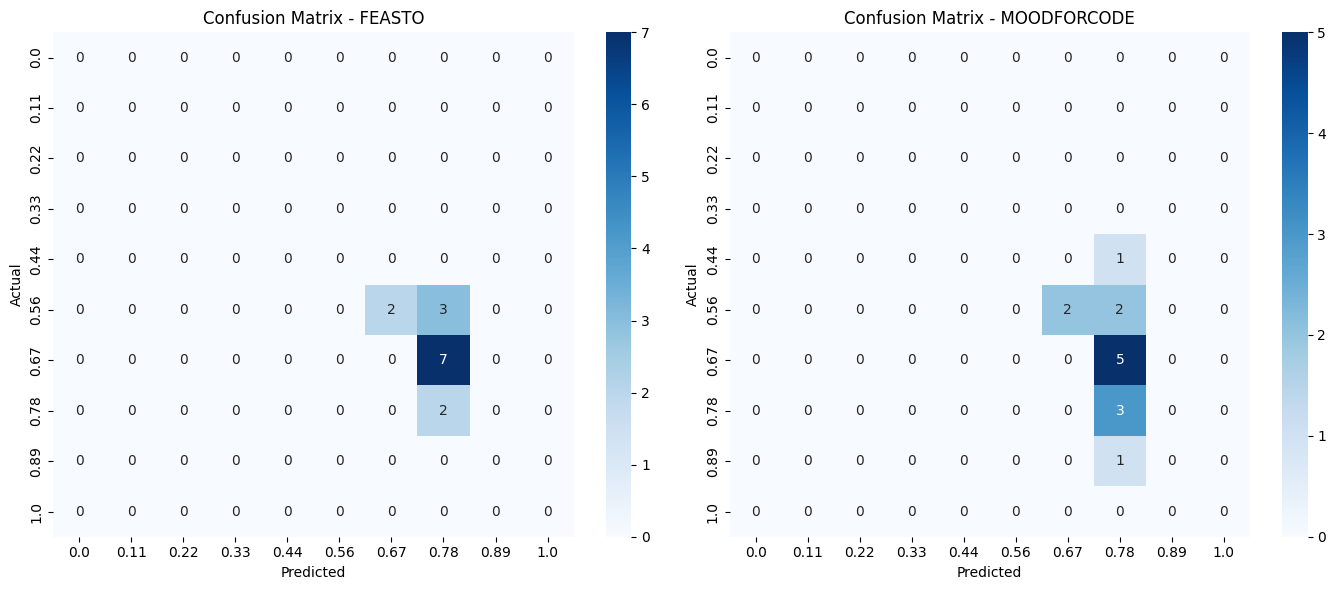

In [ ]:
# Plot confusion matrices
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(feasto_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.round(np.linspace(0, 1, 10), 2), yticklabels=np.round(np.linspace(0, 1, 10), 2))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - FEASTO')

plt.subplot(1, 2, 2)
sns.heatmap(moodforcode_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.round(np.linspace(0, 1, 10), 2), yticklabels=np.round(np.linspace(0, 1, 10), 2))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - MOODFORCODE')

plt.tight_layout()
plt.show()

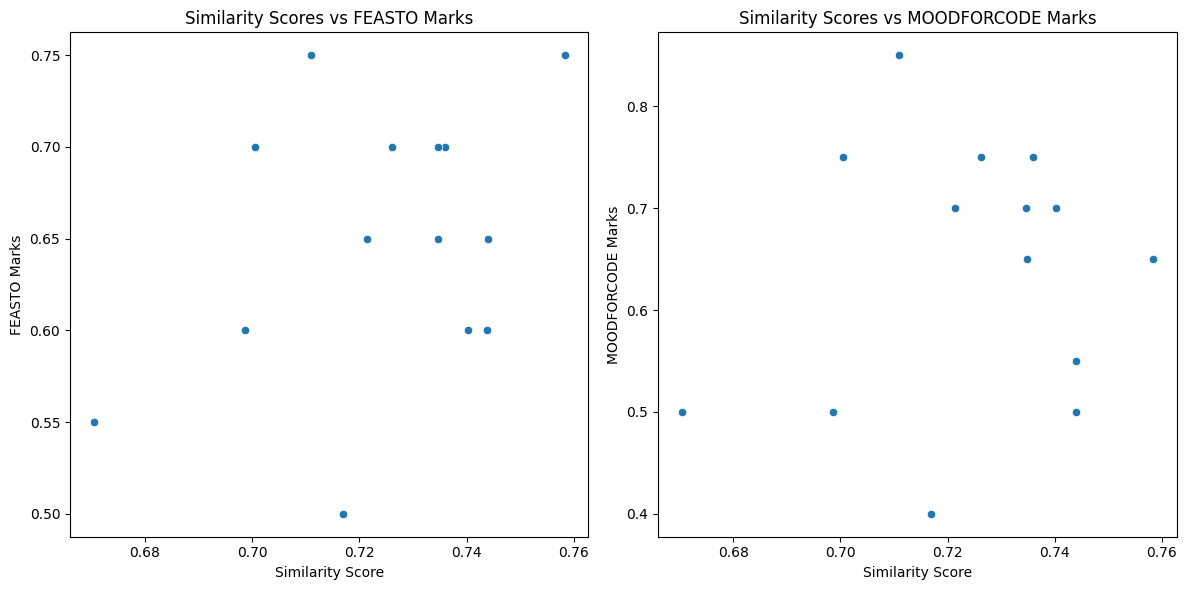

In [ ]:
# Plot similarity scores vs FEASTO and MOODFORCODE marks
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=combined_df, x='similarity_score', y='FEASTO')
plt.xlabel('Similarity Score')
plt.ylabel('FEASTO Marks')
plt.title('Similarity Scores vs FEASTO Marks')

plt.subplot(1, 2, 2)
sns.scatterplot(data=combined_df, x='similarity_score', y='MOODFORCODE')
plt.xlabel('Similarity Score')
plt.ylabel('MOODFORCODE Marks')
plt.title('Similarity Scores vs MOODFORCODE Marks')

plt.tight_layout()
plt.show()

In [ ]:
# Calculate MAPE for both companies
feasto_mape = mean_absolute_percentage_error(combined_df['FEASTO'], combined_df['similarity_score'])
moodforcode_mape = mean_absolute_percentage_error(combined_df['MOODFORCODE'], combined_df['similarity_score'])

print(f'FEASTO MAPE: {feasto_mape * 100:.2f}%')
print(f'MOODFORCODE MAPE: {moodforcode_mape * 100:.2f}%')

FEASTO MAPE: 13.41%
MOODFORCODE MAPE: 22.04%


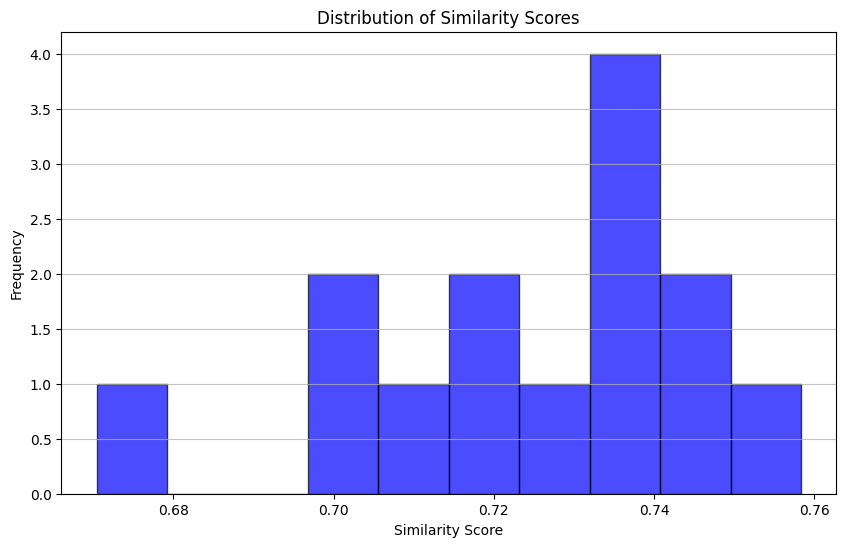

Mean Similarity Score: 0.724060327857143
Standard Deviation of Similarity Scores: 0.023046107640495615
Dynamic Threshold (Mean - 1*STD): 0.7010142202166474


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the similarity scores CSV file
similarity_df = pd.read_csv('/content/drive/MyDrive/ResearchDataSet/ResumeSimilarityScores.csv')

# Analyze the distribution of similarity scores
plt.figure(figsize=(10, 6))
plt.hist(similarity_df['similarity_score'], bins=10, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribution of Similarity Scores')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Compute statistical measures
mean_score = similarity_df['similarity_score'].mean()
std_dev = similarity_df['similarity_score'].std()
threshold = mean_score - std_dev  # Example: mean minus one standard deviation

# Filter resumes based on the dynamic threshold
matching_resumes_df = similarity_df[similarity_df['similarity_score'] >= threshold]
non_matching_resumes_df = similarity_df[similarity_df['similarity_score'] < threshold]

# Save the filtered matching resumes to a new CSV file for further analysis
matching_resumes_df.to_csv('/content/drive/MyDrive/ResearchDataSet/MatchingResumes.csv', index=False)

# Save the non-matching resumes to a new CSV file
non_matching_resumes_df.to_csv('/content/drive/MyDrive/ResearchDataSet/NonMatchingResumes.csv', index=False)

# Print threshold and some statistics
print(f"Mean Similarity Score: {mean_score}")
print(f"Standard Deviation of Similarity Scores: {std_dev}")
print(f"Dynamic Threshold (Mean - 1*STD): {threshold}")


In [ ]:
!pip install openai==0.28

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 824.6 kB/s eta 0:00:00


In [ ]:
# Step 1: Install required libraries
!pip install pandas openai

# Step 2: Import necessary libraries
import openai
import pandas as pd
import os
from google.colab import drive

# Step 3: Mount Google Drive
drive.mount('/content/drive')

# Step 4: Set OpenAI API key
openai.api_key = ''

# Step 5: Function to extract information using OpenAI API
def extract_information(text):
    prompt = f"""
    Extract the following details from the resume text:

    Name: The full name of the candidate
    Email: The email address of the candidate.
    LinkedIn: The LinkedIn profile URL of the candidate or the name mentioned near the LinkedIn icon.
    Telephone: The contact telephone number of the candidate.
    Degree: The highest degree obtained by the candidate.
    University: The name of the university from where the degree was obtained.
    Technical Skills: A list of technical skills, such as programming languages, tools, and technologies. Separate programming languages and tools
    Soft Skills: A list of soft skills. Categorize them under communication and leadership.

    Format the output as follows:
    Name: [Name]
    Email: [Email]
    LinkedIn: [LinkedIn]
    Telephone: [Telephone]
    Degree: [Degree]
    University: [University]
    Technical Skills - Languages: [Languages]
    Technical Skills - Tools: [Tools]
    Soft Skills - Communication: [Communication]
    Soft Skills - Leadership: [Leadership]


    Resume Text:
    {text}
    """

    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are an assistant that extracts structured information from resumes very clearly."},
            {"role": "user", "content": prompt}
        ],
        max_tokens=1000,
        temperature=0.6
    )

    return response.choices[0].message['content'].strip()

# Step 6: Load the matching resumes file
matching_resumes_df = pd.read_csv('/content/drive/MyDrive/ResearchDataSet/MatchingResumes.csv')

# Step 7: Directory for structured resume files
structured_files_directory = '/content/drive/MyDrive/ResearchDataSet/StructuredResumes'

if not os.path.exists(structured_files_directory):
    os.makedirs(structured_files_directory)

# Step 8: Define the expected keys
expected_keys = [
    "Name", "Email", "LinkedIn", "Telephone",
    "Degree", "University",
    "Technical Skills - Languages", "Technical Skills - Tools",
    "Soft Skills - Communication",  "Soft Skills - Leadership",

]

# Step 9: Process each matching resume
all_resumes_data = []

for file_name in matching_resumes_df['file_name']:
    input_file_path = os.path.join('/content/drive/MyDrive/ResearchDataSet/ExtractedTextFiles', file_name)

    with open(input_file_path, 'r') as file:
        resume_text = file.read()
        extracted_info = extract_information(resume_text)

        # Parse the extracted information into a dictionary
        info_dict = {}
        for line in extracted_info.split('\n'):
            if ': ' in line:
                key, value = line.split(': ', 1)
                info_dict[key.strip()] = value.strip()

        # Ensure all expected keys are in the dictionary
        for key in expected_keys:
            if key not in info_dict:
                info_dict[key] = ""

        # Append the dictionary to the list of all resumes data
        all_resumes_data.append(info_dict)

        print(f"Processed and structured {file_name}")

# Convert the list of dictionaries to a DataFrame
all_resumes_df = pd.DataFrame(all_resumes_data, columns=expected_keys)

# Save the DataFrame to a single CSV file
output_file_path = os.path.join('/content/drive/MyDrive/ResearchDataSet', 'StructuredResumes.csv')
all_resumes_df.to_csv(output_file_path, index=False)

print(f"All structured resumes saved to {output_file_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processed and structured 6_Pirunthapan Murugaiah_pdfminer.txt
Processed and structured 3_Varatharasa Sasitharan_pdfminer.txt
Processed and structured 4_Jananya_pdfminer.txt
Processed and structured 7_Printhan Vigneswaran_pdfminer.txt
Processed and structured 11_Thenujan Velthasan_pdfminer.txt
Processed and structured 8_Yathavan Prabakaran_pdfminer.txt
Processed and structured 2_Mathusan Arudselvam_pdfminer.txt
Processed and structured 5_Jeyachandran Jeyakumar_pdfminer.txt
Processed and structured 10_Thasitha Thangarasa_pdfminer.txt
Processed and structured 9_Sanusan Ponnuthurai_pdfminer.txt
Processed and structured 13_Vinusan Uruththiramorthy_pdfminer.txt
All structured resumes saved to /content/drive/MyDrive/ResearchDataSet/StructuredResumes.csv
